# Explainable AI in prediction of Cryptocurrency

## Data Science Specialization Final Project 2020-24

#### Parth Bhargava 20070122
#### Siddharth Ingle 20070122131
#### Soumyaroop Das 20070122138
#### Ishmeet Kaur 20070124016





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DS_Specialization/2018_volume.csv')

# Data Preprocessing

In [ ]:
data.head()

,Date,BTC,BTC_Volume,ADA,ADA_Volume,BCH,BCH_Volume,BNB,BNB_Volume,BTG,...,XEM,XEM_Volume,XMR,XMR_Volume,XRP,XRP_Volume,ZEC,ZEC_Volume,ZRX,ZRX_Volume
0,12-11-2017,5878.129883,1629165385,0.02,7433277,1374.39,877406443,1.52,7068831,260.179993,...,0.1839,130853,122.959999,33613128,0.1915,41553234,280.929993,28304317,0.1942,65083
1,13-11-2017,6522.450195,1135256036,0.03,4388632,1346.96,361634817,1.72,6137082,247.869995,...,0.1922,120322,121.849998,21288656,0.2001,16156188,263.170013,26860170,0.1941,64485
2,14-11-2017,6597.060059,634604991,0.03,3043474,1251.63,165309100,1.59,2888731,164.149994,...,0.2082,98249,121.279999,8771452,0.2050,12145669,269.149994,12337190,0.1994,71760
3,15-11-2017,7283.220215,922959468,0.03,6659737,1187.03,135275562,1.61,3409620,159.399994,...,0.2021,98263,120.669998,10348808,0.2083,12422123,287.589996,21152237,0.1988,137612
4,16-11-2017,7853.680176,1010130763,0.03,4742182,896.51,203434765,1.58,4245164,143.160004,...,0.1976,171104,120.260002,14865845,0.2269,93968360,295.230011,42443115,0.1901,67219


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 49 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          415 non-null    object 
 1   BTC           415 non-null    float64
 2   BTC_Volume    415 non-null    int64  
 3   ADA           415 non-null    float64
 4   ADA_Volume    415 non-null    int64  
 5   BCH           415 non-null    float64
 6   BCH_Volume    415 non-null    int64  
 7   BNB           415 non-null    float64
 8   BNB_Volume    415 non-null    int64  
 9   BTG           415 non-null    float64
 10  BTG_Volume    415 non-null    int64  
 11  DASH          415 non-null    float64
 12  DASH_Volume   415 non-null    int64  
 13  DOGE          415 non-null    float64
 14  DOGE_Volume   415 non-null    int64  
 15  EOS           415 non-null    float64
 16  EOS_Volume    415 non-null    int64  
 17  ETC           415 non-null    float64
 18  ETC_Volume    415 non-null    

In [ ]:
data.isnull().sum()

Date              0
BTC               0
BTC_Volume        0
ADA               0
ADA_Volume        0
BCH               0
BCH_Volume        0
BNB               0
BNB_Volume        0
BTG               0
BTG_Volume        0
DASH              0
DASH_Volume       0
DOGE              0
DOGE_Volume       0
EOS               0
EOS_Volume        0
ETC               0
ETC_Volume        0
ETH               0
ETH_Volume        0
IOT               0
IOT_Volume        0
LINK              0
LINK_Volume       0
LTC               0
LTC_Volume        0
NEO               0
NEO_Volume        0
QTUM              0
QTUM_Volume       0
TRX               0
TRX_Volume        0
USDT              0
USDT_Volume       0
VEN             153
VEN_Volume      153
WAVES             0
WAVES_Volume      0
XEM               0
XEM_Volume        0
XMR               0
XMR_Volume        0
XRP               0
XRP_Volume        0
ZEC               0
ZEC_Volume        0
ZRX               0
ZRX_Volume        0
dtype: int64

In [ ]:
data['VEN'].fillna(0, inplace=True)
data['VEN_Volume'].fillna(0, inplace=True)

# Exploratory Data Analysis

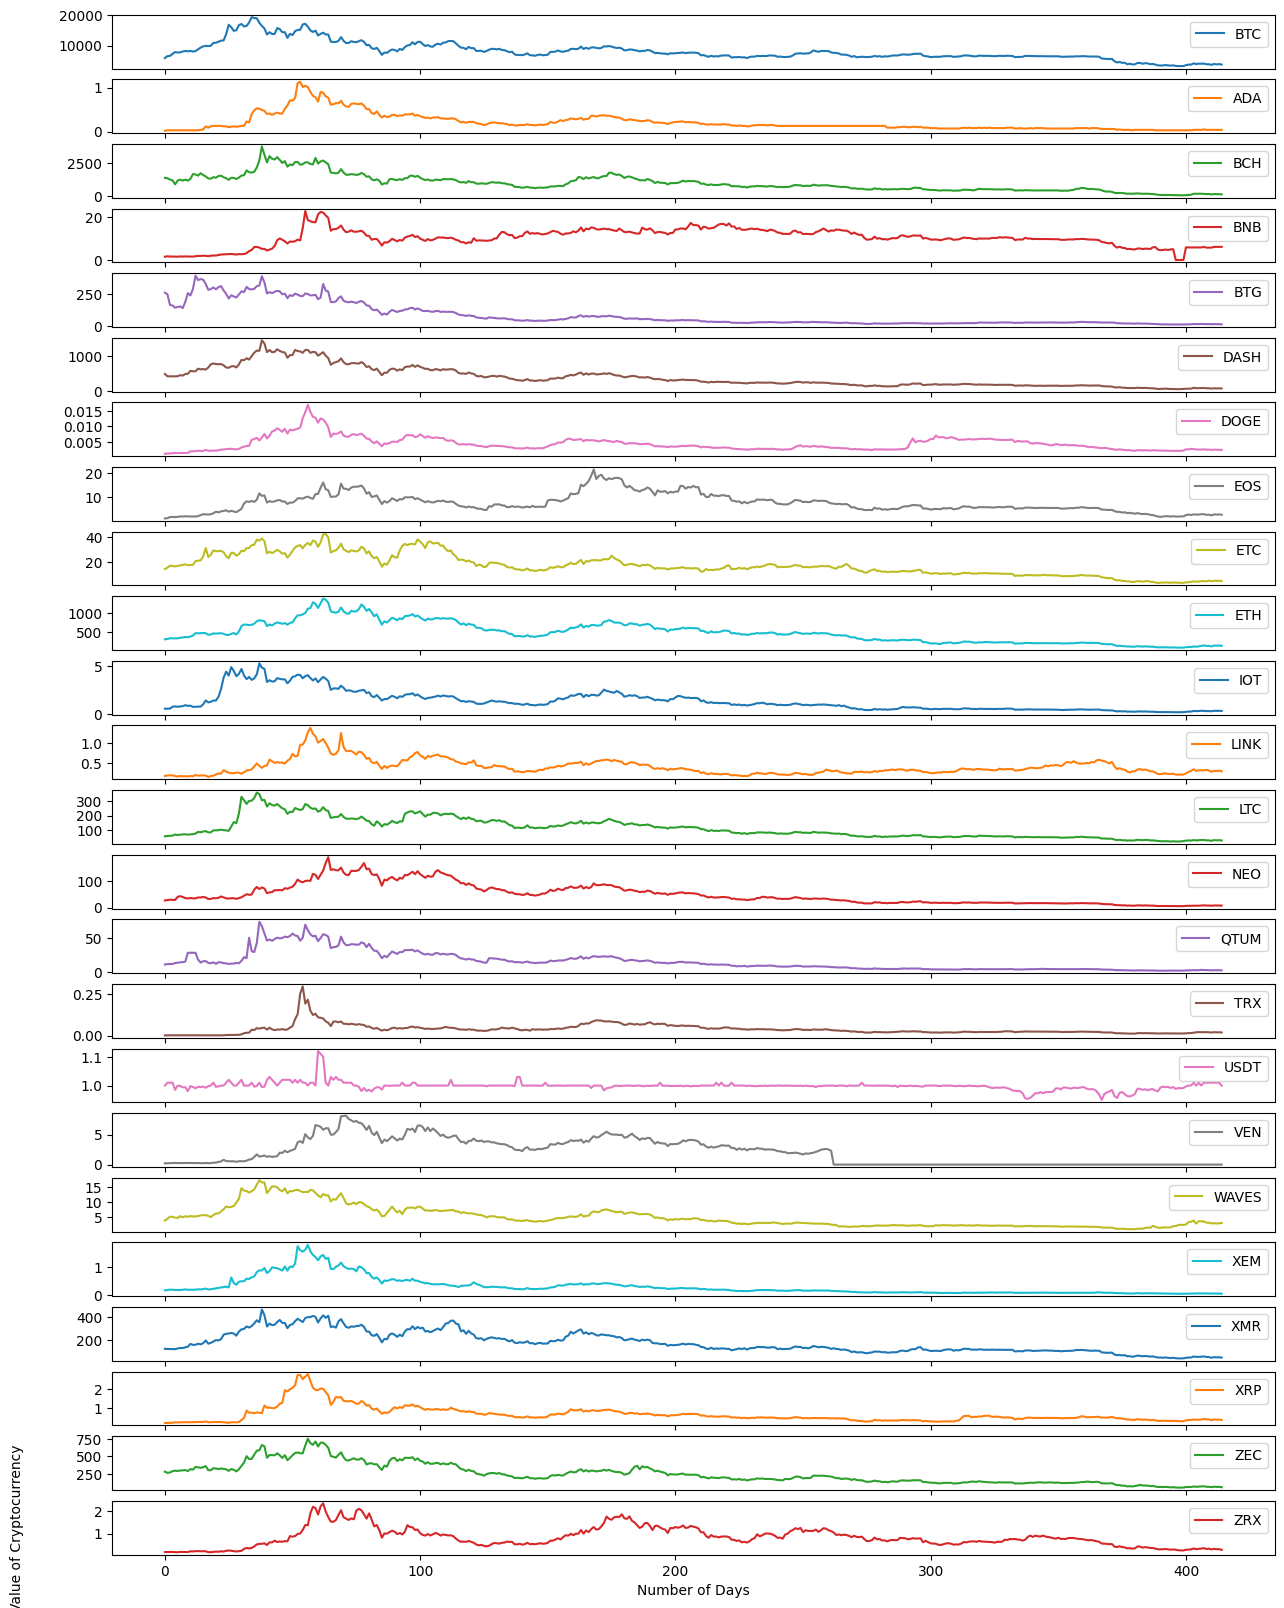

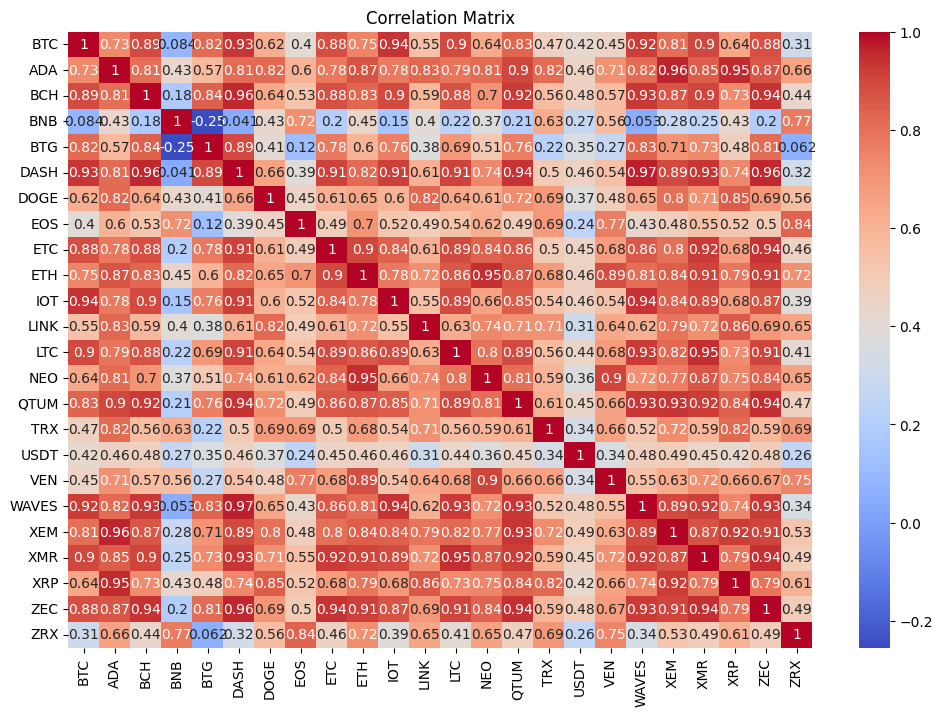

In [ ]:
# Visualize the distribution of cryptocurrency prices (BTC, ADA, etc.)
crypto_columns = ['BTC', 'ADA', 'BCH', 'BNB', 'BTG', 'DASH', 'DOGE', 'EOS', 'ETC', 'ETH', 'IOT', 'LINK', 'LTC', 'NEO', 'QTUM', 'TRX', 'USDT', 'VEN', 'WAVES', 'XEM', 'XMR', 'XRP', 'ZEC', 'ZRX']
data[crypto_columns].plot(subplots=True, figsize=(15, 20))
plt.xlabel('Number of Days')
plt.ylabel('Value of Cryptocurrency', labelpad=50)
plt.show()

# Visualize the correlations between cryptocurrency prices
correlation_matrix = data[crypto_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

plt.show()

In [ ]:
# # Visualize the distribution of cryptocurrency prices (BTC, ADA, etc.)
# crypto_columns = ['BTC', 'ADA', 'BCH', 'BNB', 'BTG', 'DASH', 'DOGE', 'EOS', 'ETC', 'ETH', 'IOT', 'LINK', 'LTC', 'NEO', 'QTUM', 'TRX', 'USDT', 'VEN', 'WAVES', 'XEM', 'XMR', 'XRP', 'ZEC', 'ZRX']
# fig, axes = plt.subplots(len(crypto_columns), 1, figsize=(15, 20), sharex=True)

# # Define a color cycle for line plots
# colors = plt.cm.viridis(np.linspace(0, 1, len(crypto_columns)))

# for i, (column, color) in enumerate(zip(crypto_columns, colors)):
#     axes[i].plot(data.index, data[column], color=color)
#     axes[i].set_ylabel(column)

# # Set a single y-label in the middle for the entire figure
# fig.text(0.04, 0.5, 'Value of Cryptocurrency', va='center', rotation='vertical')

# plt.xlabel('Number of Days')
# plt.show()


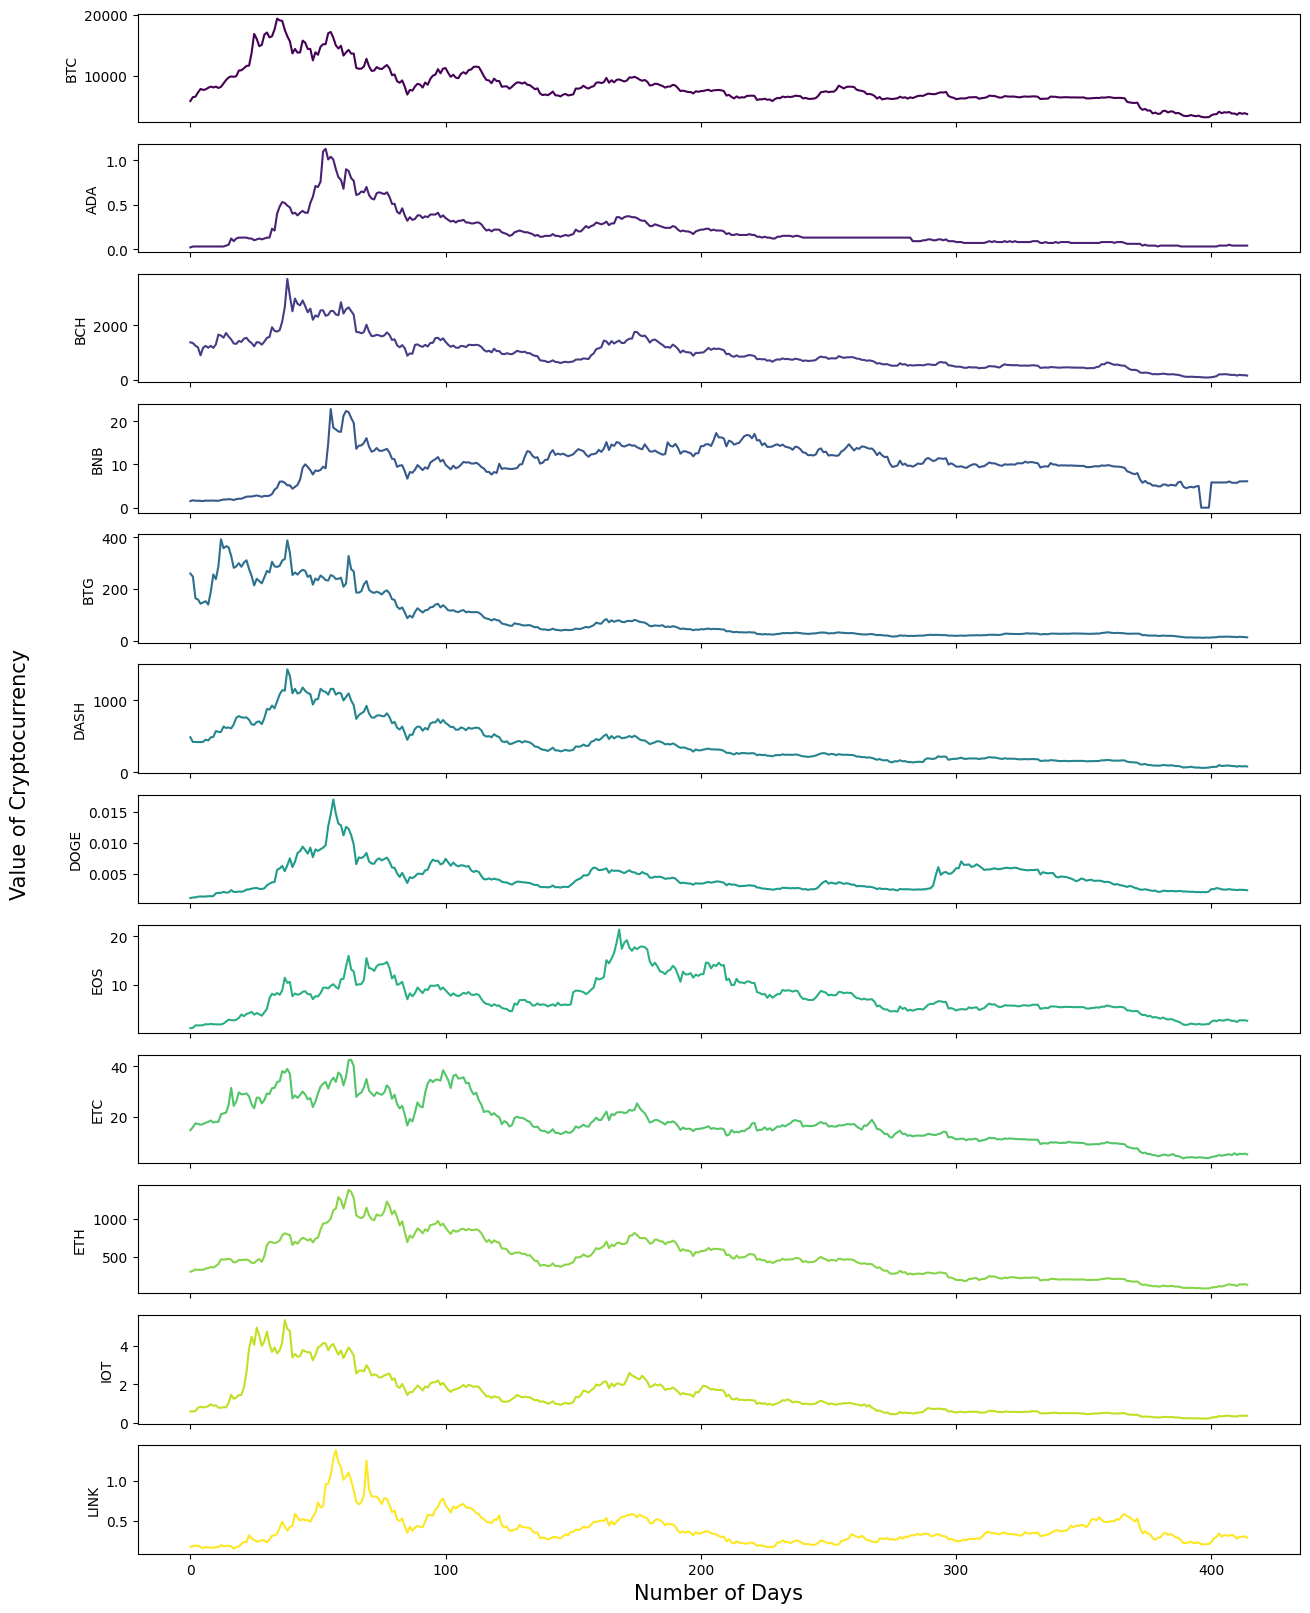

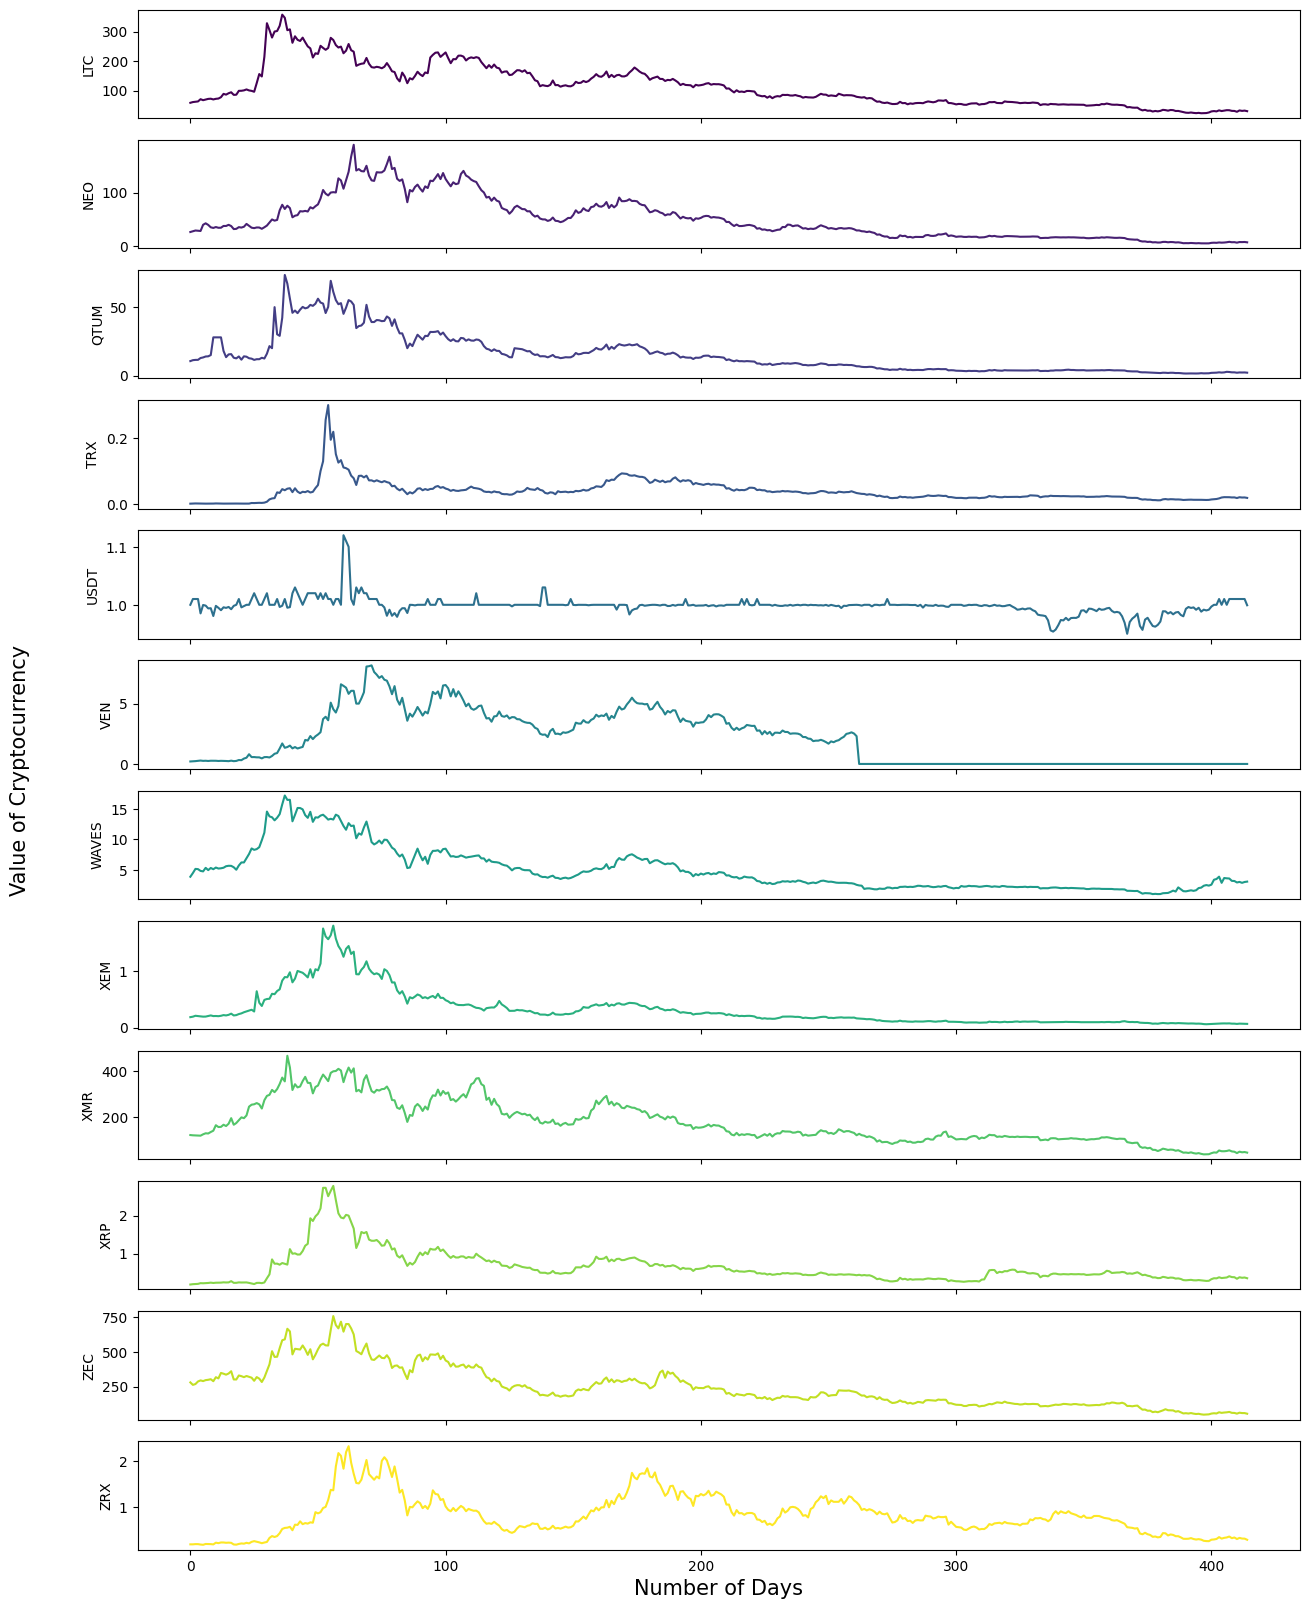

In [ ]:
# # Visualize the distribution of cryptocurrency prices (BTC, ADA, etc.)
# crypto_columns1 = ['BTC', 'ADA', 'BCH', 'BNB', 'BTG', 'DASH', 'DOGE', 'EOS', 'ETC', 'ETH', 'IOT', 'LINK']
# crypto_columns2=['LTC', 'NEO', 'QTUM', 'TRX', 'USDT', 'VEN', 'WAVES', 'XEM', 'XMR', 'XRP', 'ZEC', 'ZRX']
# fig, axes = plt.subplots(len(crypto_columns1), 1, figsize=(15, 20), sharex=True)

# # Define a color cycle for line plots
# colors = plt.cm.viridis(np.linspace(0, 1, len(crypto_columns1)))

# for i, (column, color) in enumerate(zip(crypto_columns1, colors)):
#     axes[i].plot(data.index, data[column], color=color)
#     axes[i].set_ylabel(column)

# # Set a single y-label in the middle for the entire figure
# fig.text(0.04, 0.5, 'Value of Cryptocurrency', va='center', rotation='vertical', fontsize=15)

# plt.xlabel('Number of Days', fontsize=15)
# plt.show()

# ###############################

# fig, axes = plt.subplots(len(crypto_columns2), 1, figsize=(15, 20), sharex=True)

# # Define a color cycle for line plots
# colors = plt.cm.viridis(np.linspace(0, 1, len(crypto_columns2)))

# for i, (column, color) in enumerate(zip(crypto_columns2, colors)):
#     axes[i].plot(data.index, data[column], color=color)
#     axes[i].set_ylabel(column)

# # Set a single y-label in the middle for the entire figure
# fig.text(0.04, 0.5, 'Value of Cryptocurrency', va='center', rotation='vertical', fontsize=15)

# plt.xlabel('Number of Days', fontsize=15)
# plt.show()


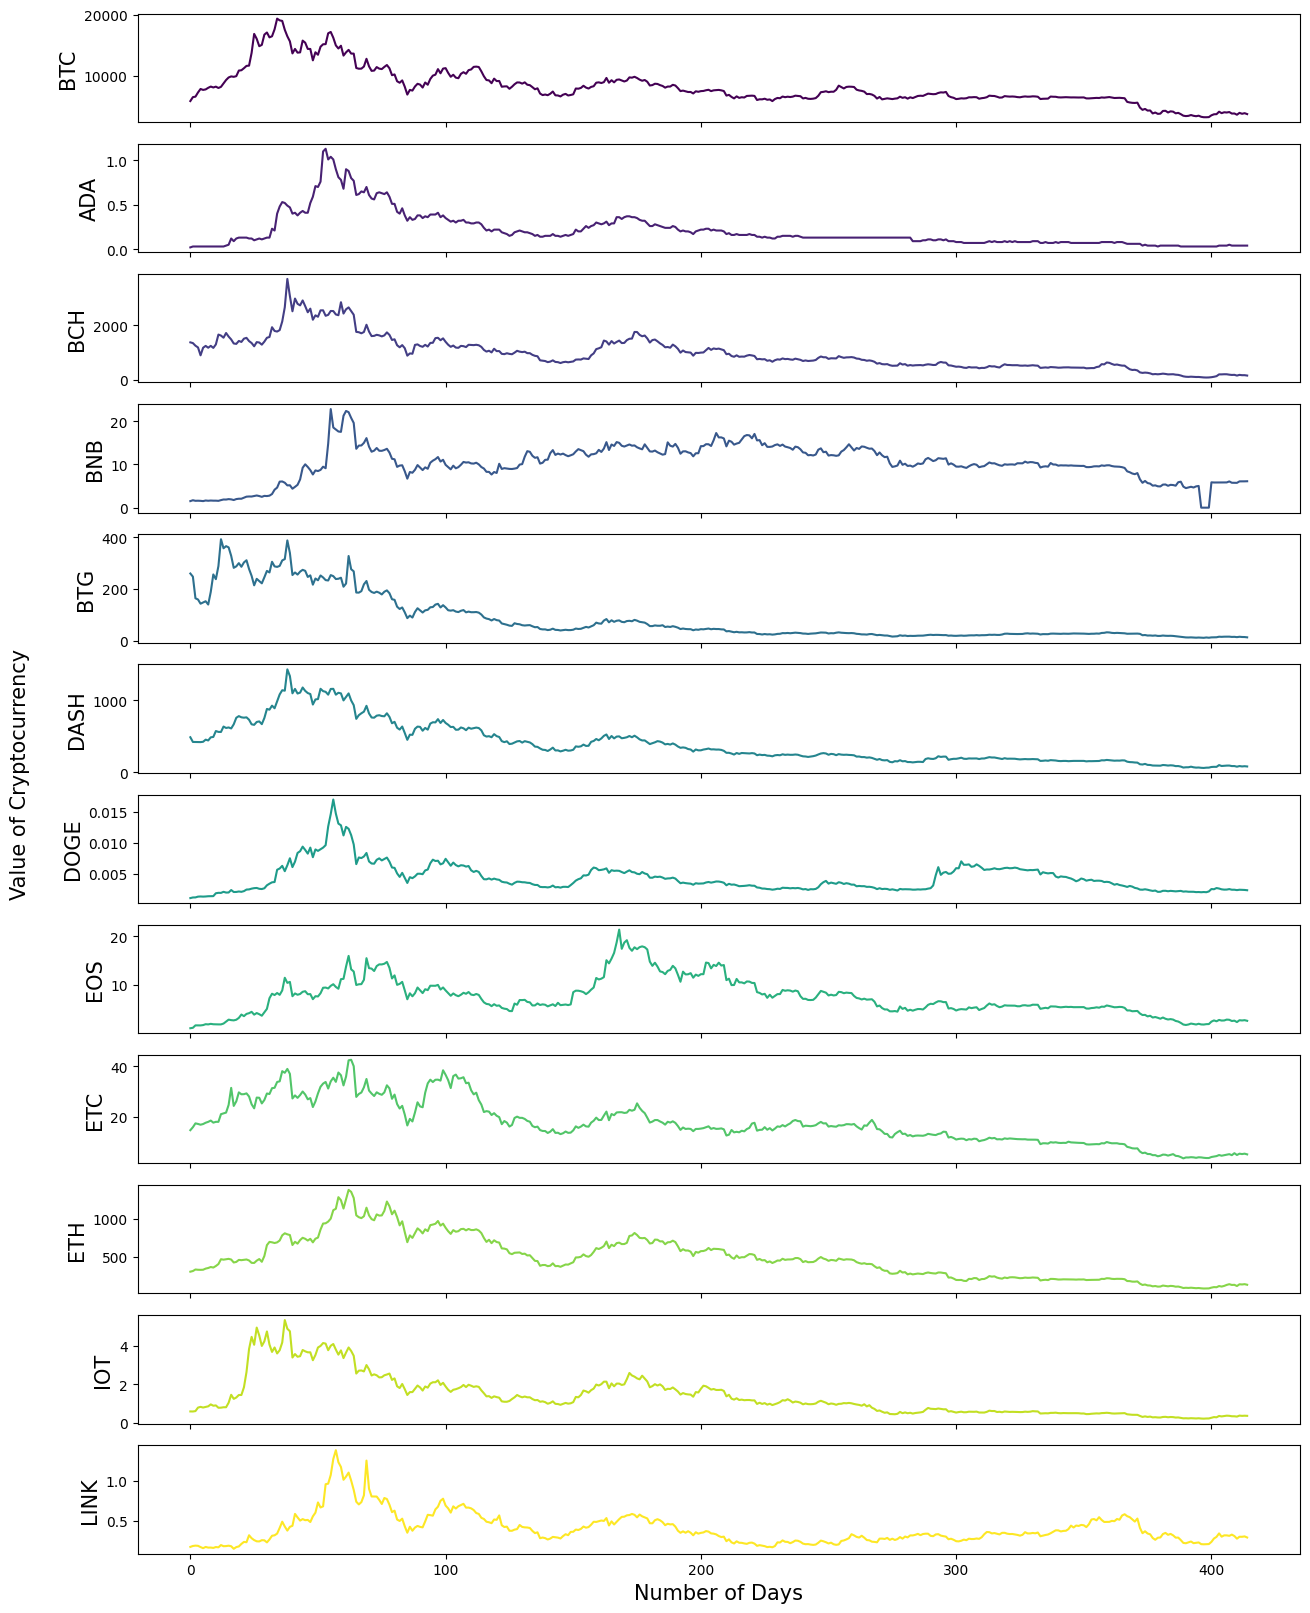

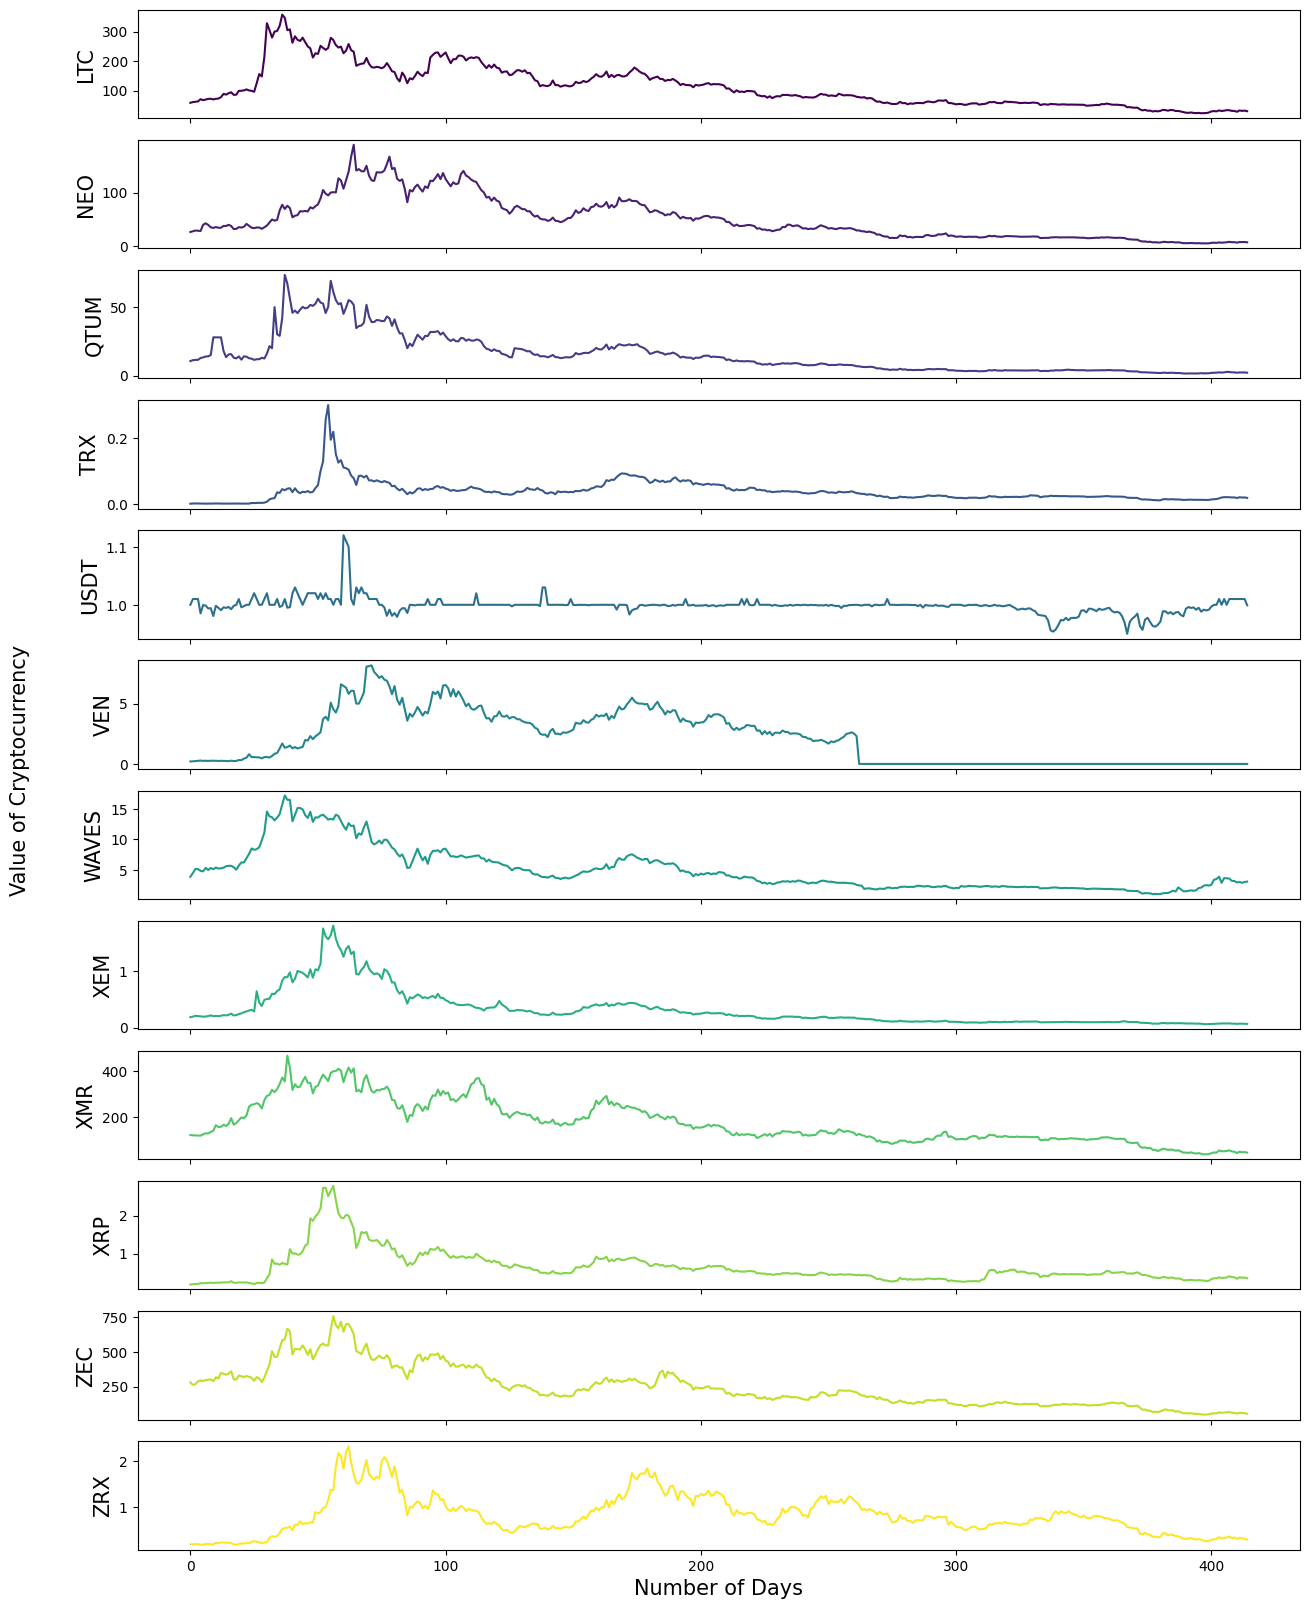

In [ ]:
# Visualize the distribution of cryptocurrency prices (BTC, ADA, etc.)
crypto_columns1 = ['BTC', 'ADA', 'BCH', 'BNB', 'BTG', 'DASH', 'DOGE', 'EOS', 'ETC', 'ETH', 'IOT', 'LINK']
crypto_columns2=['LTC', 'NEO', 'QTUM', 'TRX', 'USDT', 'VEN', 'WAVES', 'XEM', 'XMR', 'XRP', 'ZEC', 'ZRX']

# Create subplots for the first set of cryptocurrencies
fig, axes = plt.subplots(len(crypto_columns1), 1, figsize=(15, 20), sharex=True)

# Define a color cycle for line plots
colors = plt.cm.viridis(np.linspace(0, 1, len(crypto_columns1)))

for i, (column, color) in enumerate(zip(crypto_columns1, colors)):
    axes[i].plot(data.index, data[column], color=color)
    axes[i].set_ylabel(column, fontsize=15)  # Increase y-label fontsize for each subplot

# Set a single x-label in the middle for the entire figure
fig.text(0.04, 0.5, 'Value of Cryptocurrency', va='center', rotation='vertical', fontsize=15)
plt.xlabel('Number of Days', fontsize=15)
plt.show()

# Create subplots for the second set of cryptocurrencies
fig, axes = plt.subplots(len(crypto_columns2), 1, figsize=(15, 20), sharex=True)

# Define a color cycle for line plots
colors = plt.cm.viridis(np.linspace(0, 1, len(crypto_columns2)))

for i, (column, color) in enumerate(zip(crypto_columns2, colors)):
    axes[i].plot(data.index, data[column], color=color)
    axes[i].set_ylabel(column, fontsize=15)  # Increase y-label fontsize for each subplot

# Set a single x-label in the middle for the entire figure
fig.text(0.04, 0.5, 'Value of Cryptocurrency', va='center', rotation='vertical', fontsize=15)
plt.xlabel('Number of Days', fontsize=15)
plt.show()


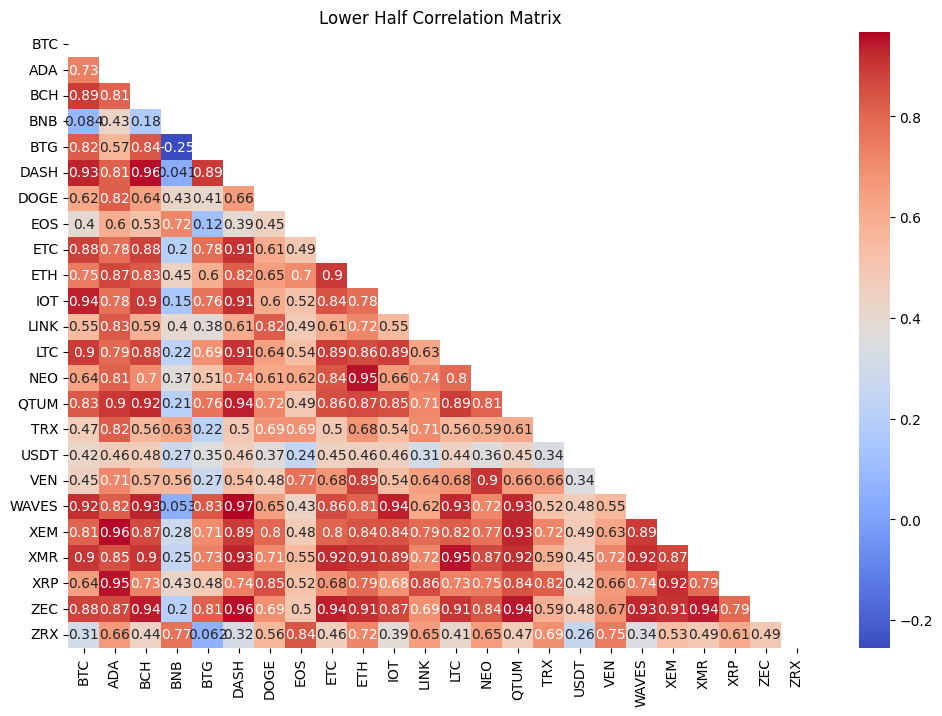

In [ ]:
# Get the correlation matrix
crypto_columns = ['BTC', 'ADA', 'BCH', 'BNB', 'BTG', 'DASH', 'DOGE', 'EOS', 'ETC', 'ETH', 'IOT', 'LINK', 'LTC', 'NEO', 'QTUM', 'TRX', 'USDT', 'VEN', 'WAVES', 'XEM', 'XMR', 'XRP', 'ZEC', 'ZRX']
correlation_matrix = data[crypto_columns].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap of the lower half of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask)

plt.title('Lower Half Correlation Matrix')
plt.show()

## 1. Implementation of Linear Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score

data = pd.read_csv('/content/drive/MyDrive/DS_Specialization/2018_volume.csv')


X = data[['BTC', 'ADA', 'BCH', 'BNB', 'BTG', 'DASH', 'DOGE', 'EOS', 'ETC', 'ETH']]
y = data['XRP']

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

# Model Fitting
model.fit(X_train, y_train)

# Prediction- Test Data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error: 0.009827624310255014
R-squared (R2) Score: 0.9595124418149825


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 2. Implementation of Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = data[['BTC', 'ADA', 'BCH', 'BNB', 'BTG', 'DASH', 'DOGE', 'EOS', 'ETC', 'ETH']]
y = data['XRP']

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regression
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Model Fitting
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error: 0.00394374268826509
R-squared (R2) Score: 0.9837526846247823


## 3. Implementation of Gradient Boosting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = data[['BTC', 'ADA', 'BCH', 'BNB', 'BTG', 'DASH', 'DOGE', 'EOS', 'ETC', 'ETH']]
y = data['XRP']

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting Regression
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Model Fitting
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error: 0.007096880433281481
R-squared (R2) Score: 0.9707624802898942


## 4. Implementation of LSTM Model

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

X = data[['BTC', 'ADA', 'BCH', 'BNB', 'BTG', 'DASH', 'DOGE', 'EOS', 'ETC', 'ETH']]
y = data['XRP']

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))

# Model Compilation
model.compile(loss='mean_squared_error', optimizer='adam')

# Model Training
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Inverse transform to get actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = np.mean((y_pred - y_test) ** 2)
print(f"Mean Squared Error: {mse}")


Epoch 1/50
6/6 [==============================] - 5s 7ms/step - loss: 0.0509
Epoch 2/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0369
Epoch 3/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0257
Epoch 4/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0176
Epoch 5/50
6/6 [==============================] - 0s 7ms/step - loss: 0.0141
Epoch 6/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0140
Epoch 7/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0129
Epoch 8/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0113
Epoch 9/50
6/6 [==============================] - 0s 5ms/step - loss: 0.0104
Epoch 10/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0094
Epoch 11/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0086
Epoch 12/50
6/6 [==============================] - 0s 6ms/step - loss: 0.0078
Epoch 13/50
6/6 [==============================] - 0s 6ms/step - loss: 0.

## 5. Performance Metrics and Comparision

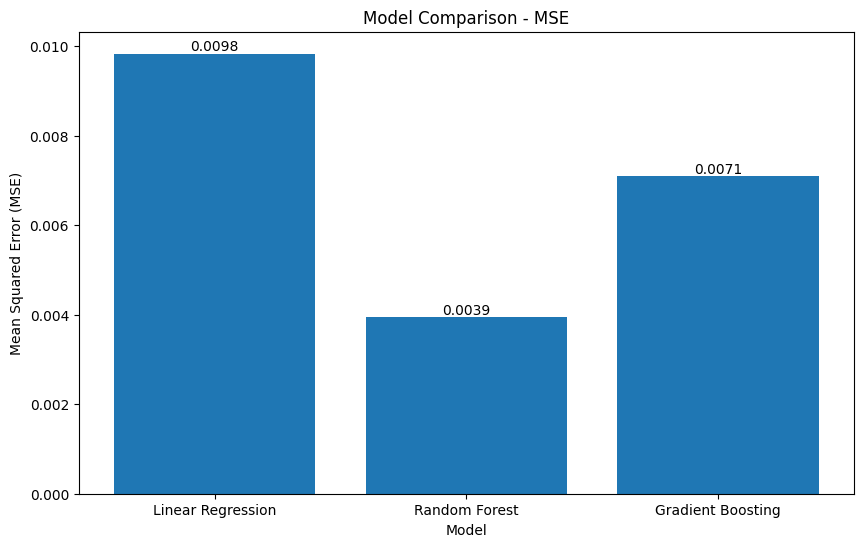

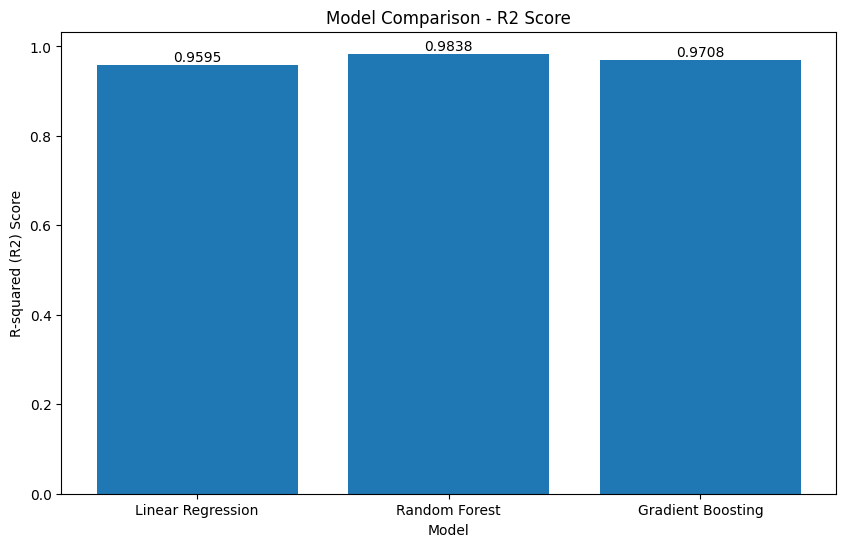

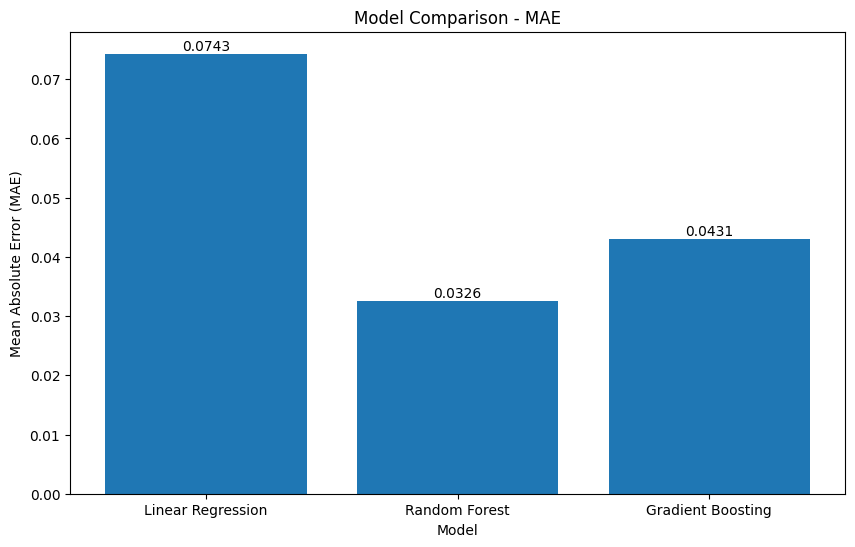

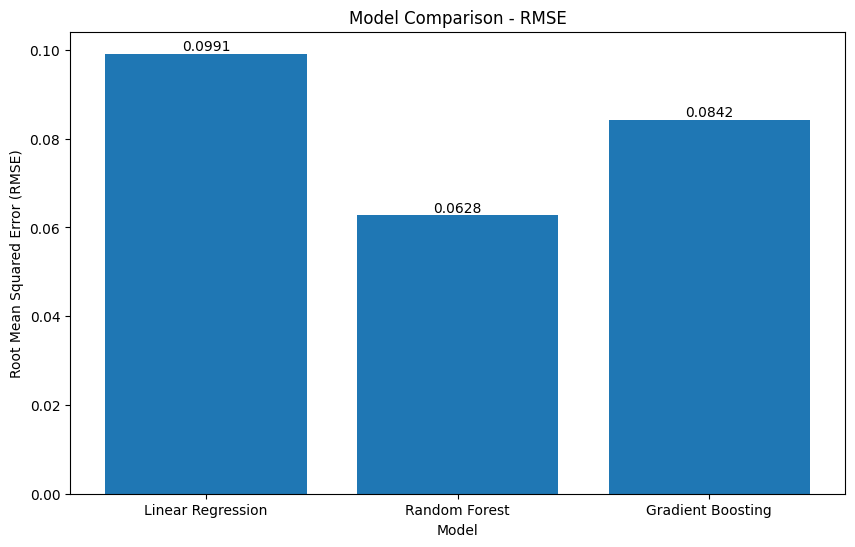

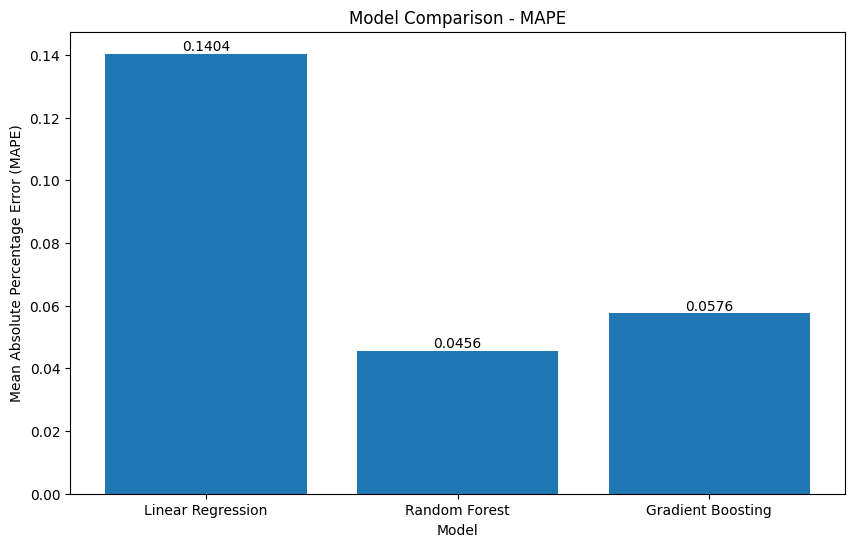

In [ ]:
# Bar chart to compare Mean Squared Error (MSE)
plt.figure(figsize=(10, 6))
mse_bars = plt.bar(mse_scores.keys(), mse_scores.values())
plt.xlabel("Model")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Model Comparison - MSE")

for bar, value in zip(mse_bars, mse_scores.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, value, round(value, 4), ha='center', va='bottom')

plt.show()

# Bar chart to compare R-squared (R2) Score
plt.figure(figsize=(10, 6))
r2_bars = plt.bar(r2_scores.keys(), r2_scores.values())
plt.xlabel("Model")
plt.ylabel("R-squared (R2) Score")
plt.title("Model Comparison - R2 Score")

for bar, value in zip(r2_bars, r2_scores.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, value, round(value, 4), ha='center', va='bottom')

plt.show()

# Bar chart to compare Mean Absolute Error (MAE)
plt.figure(figsize=(10, 6))
mae_bars = plt.bar(mae_scores.keys(), mae_scores.values())
plt.xlabel("Model")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Model Comparison - MAE")

for bar, value in zip(mae_bars, mae_scores.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, value, round(value, 4), ha='center', va='bottom')

plt.show()

# Bar chart to compare Root Mean Squared Error (RMSE)
plt.figure(figsize=(10, 6))
rmse_bars = plt.bar(rmse_scores.keys(), rmse_scores.values())
plt.xlabel("Model")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Model Comparison - RMSE")

for bar, value in zip(rmse_bars, rmse_scores.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, value, round(value, 4), ha='center', va='bottom')

plt.show()

# Bar chart to compare Mean Absolute Percentage Error (MAPE)
plt.figure(figsize=(10, 6))
mape_bars = plt.bar(mape_scores.keys(), mape_scores.values())
plt.xlabel("Model")
plt.ylabel("Mean Absolute Percentage Error (MAPE)")
plt.title("Model Comparison - MAPE")

for bar, value in zip(mape_bars, mape_scores.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, value, round(value, 4), ha='center', va='bottom')

plt.show()


# 6. Explainable AI- SHAP

In [ ]:
from sklearn.impute import SimpleImputer

num_samples_train, num_time_steps_train, num_features_train = X_train.shape
num_samples_test, num_time_steps_test, num_features_test = X_test.shape

X_train_2D = X_train.reshape(num_samples_train * num_time_steps_train, num_features_train)
X_test_2D = X_test.reshape(num_samples_test * num_time_steps_test, num_features_test)

imputer = SimpleImputer(strategy='mean')
X_train_2D = imputer.fit_transform(X_train_2D)
X_test_2D = imputer.transform(X_test_2D)

X_train = X_train_2D.reshape(num_samples_train, num_time_steps_train, num_features_train)
X_test = X_test_2D.reshape(num_samples_test, num_time_steps_test, num_features_test)


ValueError: ignored

In [ ]:
import numpy as np

# Check for NaN values in your NumPy arrays
nan_rows_train = np.isnan(X_train).any(axis=(1, 2))  # Check along both time steps and features
nan_rows_test = np.isnan(X_test).any(axis=(1, 2))  # Check along both time steps and features

# Remove rows with NaN values
X_train = X_train[~nan_rows_train]
y_train = y_train[~nan_rows_train]

X_test = X_test[~nan_rows_test]
y_test = y_test[~nan_rows_test]


ValueError: ignored

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.9 MB/s eta 0:00:00


## 6.1. SHAP with Random Forest Regression

Feature: BTC
Importance Score: 0.0031767162967528914
Explanation: 0.028154677434603943


Feature: BTC_Volume
Importance Score: 0.0007841800755917506
Explanation: -0.0004915996174103861


Feature: ADA
Importance Score: 0.13682339549347147
Explanation: 0.5353300275489536


Feature: ADA_Volume
Importance Score: 0.001125858950932016
Explanation: -0.002504729665013804


Feature: BCH
Importance Score: 0.0023377006545991677
Explanation: 0.008348976663870258


Feature: BCH_Volume
Importance Score: 0.00032526362187029924
Explanation: 0.0007072378123843049


Feature: BNB
Importance Score: 0.0042488304083665215
Explanation: 0.0058491865714992795


Feature: BNB_Volume
Importance Score: 0.0005833112799260837
Explanation: -0.0006152757687883135


Feature: BTG
Importance Score: 0.013062383119791736
Explanation: -0.00771654911522381


Feature: BTG_Volume
Importance Score: 0.01364091467515868
Explanation: -0.00793427033069037


Feature: DASH
Importance Score: 0.013317869328102047
Explanation: 0.0533888

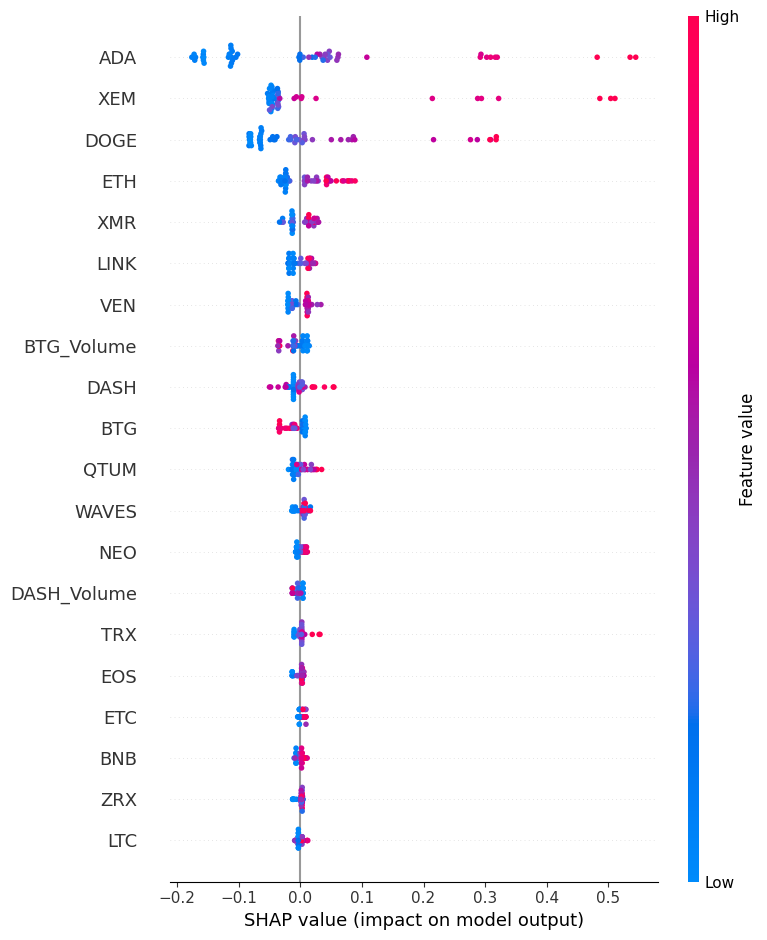

In [ ]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Column selection for independent and dependent attributes
X = data.drop(columns=['Date', 'XRP'])
y = data['XRP']

# Splitting of dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#checking for NaN values
nan_rows_train = np.isnan(X_train).any(axis=1)
nan_rows_test = np.isnan(X_test).any(axis=1)

# Remove rows with NaN values
X_train = X_train[~nan_rows_train]
y_train = y_train[~nan_rows_train]

X_test = X_test[~nan_rows_test]
y_test = y_test[~nan_rows_test]

# Random Forest Regression Model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Model Fitting
model.fit(X_train, y_train)

# Initialize an explainer for the Random Forest model
explainer = shap.Explainer(model)

# SHAP Value Calculation
shap_values = explainer.shap_values(X_test)

# Plotting of SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X.columns, show=False)

feature_importance = np.abs(shap_values).mean(axis=0)
feature_names = X.columns

for i, feature in enumerate(feature_names):
    print(f"Feature: {feature}")
    print(f"Importance Score: {feature_importance[i]}")
    print(f"Explanation: {shap_values[0][i]}")  # Display the first instance's explanation
    print("\n")

# Prediction
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

## 6.2. SHAP with Linear Regression

Feature: BTC
Importance Score: 0.008322162677822677
Explanation: .values =
0.0018927282561204985

.base_values =
0.7948495256968264

.data =
10258.746761019229


Feature: BTC_Volume
Importance Score: 0.015508909910307523
Explanation: .values =
-0.004185034887460221

.base_values =
0.7948495256968264

.data =
1329025085.5961537


Feature: ADA
Importance Score: 0.3101393875482188
Explanation: .values =
0.025581571239259214

.base_values =
0.7948495256968264

.data =
0.3069230769230769


Feature: ADA_Volume
Importance Score: 0.011744545809276991
Explanation: .values =
-0.0023449041226623166

.base_values =
0.7948495256968264

.data =
21023480.384615384


Feature: BCH
Importance Score: 0.10376002100925
Explanation: .values =
0.01424935871813594

.base_values =
0.7948495256968264

.data =
1389.705576923077


Feature: BCH_Volume
Importance Score: 0.027055942889517515
Explanation: .values =
-0.00031926153434273395

.base_values =
0.7948495256968264

.data =
136044994.44230768


Feature: BNB
I

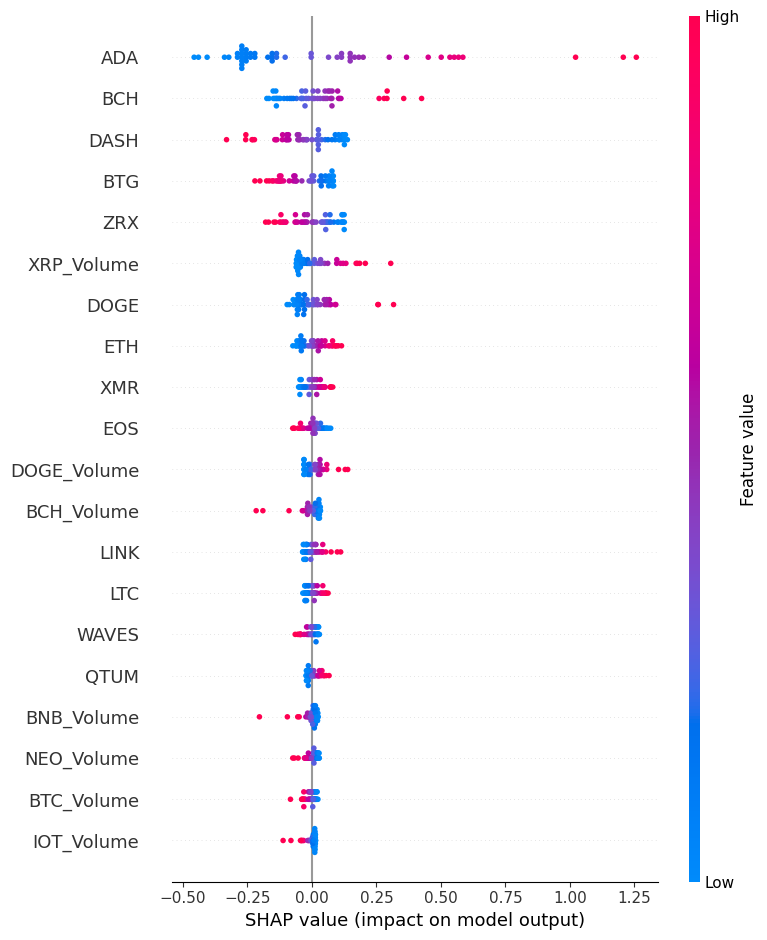

In [ ]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Column selection for independent and dependent attributes
X = data.drop(columns=['Date', 'XRP'])
y = data['XRP']

# Splitting of dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking for NaN values
nan_rows_train = np.isnan(X_train).any(axis=1)
nan_rows_test = np.isnan(X_test).any(axis=1)

# Remove rows with NaN values
X_train = X_train[~nan_rows_train]
y_train = y_train[~nan_rows_train]

X_test = X_test[~nan_rows_test]
y_test = y_test[~nan_rows_test]

# Linear Regression Model
model = LinearRegression()

# Model Fitting
model.fit(X_train, y_train)

# Initialize an explainer for the Linear Regression model
explainer = shap.Explainer(model, X_train)

# SHAP Value Calculation
shap_values = explainer(X_test)

# Plotting of SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X.columns, show=False)

feature_importance = np.abs(shap_values.values).mean(axis=0)
feature_names = X.columns

for i, feature in enumerate(feature_names):
    print(f"Feature: {feature}")
    print(f"Importance Score: {feature_importance[i]}")
    print(f"Explanation: {shap_values[:, i].mean(0)}")
    print("\n")

# Prediction
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")


## 6.3. SHAP with Gradient Boosting

Feature: BTC
Importance Score: 0.0016785625263641317
Explanation: 0.022665852497659414


Feature: BTC_Volume
Importance Score: 0.0012730995025230726
Explanation: -0.001549080593519298


Feature: ADA
Importance Score: 0.11527124045721301
Explanation: 0.38663403335356017


Feature: ADA_Volume
Importance Score: 0.001189291452671888
Explanation: -0.004298317631706874


Feature: BCH
Importance Score: 0.0008410016750619192
Explanation: 0.0013811875068375273


Feature: BCH_Volume
Importance Score: 0.0004525808098624531
Explanation: -0.007336169869703788


Feature: BNB
Importance Score: 0.002694567821182333
Explanation: -0.00633959574904617


Feature: BNB_Volume
Importance Score: 0.004604510414960115
Explanation: -0.0017802392103330959


Feature: BTG
Importance Score: 0.005281158497887211
Explanation: -0.0015095234589052845


Feature: BTG_Volume
Importance Score: 0.009101964293781671
Explanation: -0.004496458440966654


Feature: DASH
Importance Score: 0.013385864142208805
Explanation: 0.059727

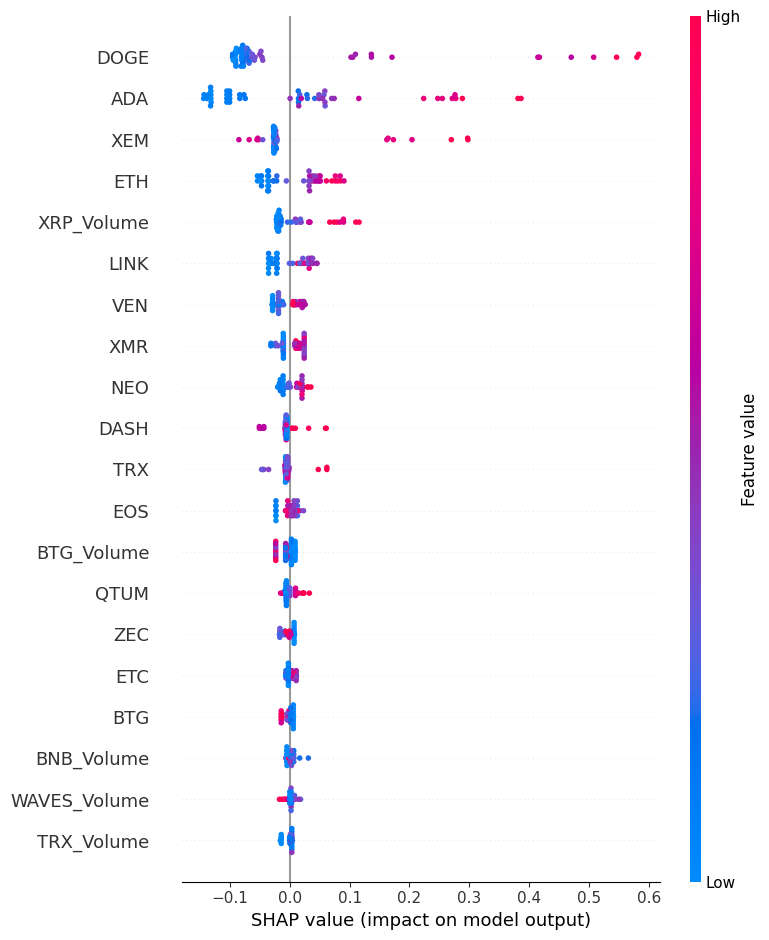

In [ ]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Column selection for independent and dependent attributes
X = data.drop(columns=['Date', 'XRP'])
y = data['XRP']

# Splitting of dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking for NaN values
nan_rows_train = np.isnan(X_train).any(axis=1)
nan_rows_test = np.isnan(X_test).any(axis=1)

# Remove rows with NaN values
X_train = X_train[~nan_rows_train]
y_train = y_train[~nan_rows_train]

X_test = X_test[~nan_rows_test]
y_test = y_test[~nan_rows_test]

# Gradient Boosting Regression Model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Model Fitting
model.fit(X_train, y_train)

# Initialize an explainer for the Gradient Boosting model
explainer = shap.Explainer(model)

# SHAP Value Calculation
shap_values = explainer.shap_values(X_test)

# Plotting of SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X.columns, show=False)

feature_importance = np.abs(shap_values).mean(axis=0)
feature_names = X.columns

for i, feature in enumerate(feature_names):
    print(f"Feature: {feature}")
    print(f"Importance Score: {feature_importance[i]}")
    print(f"Explanation: {shap_values[0][i]}")  # Display the first instance's explanation
    print("\n")

# Prediction
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")


## 6.4. SHAP with LSTM

In [ ]:
pip install --upgrade tensorflow shap


In [ ]:
pip install tensorflow


In [ ]:
pip install --upgrade shap


Epoch 1/10
7/7 - 3s - loss: 0.3215 - 3s/epoch - 478ms/step
Epoch 2/10
7/7 - 0s - loss: 0.3146 - 27ms/epoch - 4ms/step
Epoch 3/10
7/7 - 0s - loss: 0.3084 - 27ms/epoch - 4ms/step
Epoch 4/10
7/7 - 0s - loss: 0.3024 - 30ms/epoch - 4ms/step
Epoch 5/10
7/7 - 0s - loss: 0.2971 - 31ms/epoch - 4ms/step
Epoch 6/10
7/7 - 0s - loss: 0.2919 - 28ms/epoch - 4ms/step
Epoch 7/10
7/7 - 0s - loss: 0.2866 - 26ms/epoch - 4ms/step
Epoch 8/10
7/7 - 0s - loss: 0.2813 - 30ms/epoch - 4ms/step
Epoch 9/10
7/7 - 0s - loss: 0.2766 - 22ms/epoch - 3ms/step
Epoch 10/10
7/7 - 0s - loss: 0.2720 - 25ms/epoch - 4ms/step


`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Feature: BTC
Importance Score: 0.0


Feature: BTC_Volume
Importance Score: 0.0


Feature: ADA
Importance Score: 0.0


Feature: ADA_Volume
Importance Score: 0.0


Feature: BCH
Importance Score: 0.0


Feature: BCH_Volume
Importance Score: 0.0


Feature: BNB
Importance Score: 0.0


Feature: BNB_Volume
Importance Score: 0.0


Feature: BTG
Importance Score: 0.0


Feature: BTG_Volume
Importance Score: 0.0


Feature: DASH
Importance Score: 0.0


Feature: DASH_Volume
Importance Score: 0.0


Feature: DOGE
Importance Score: 0.0


Feature: DOGE_Volume
Importance Score: 0.0


Feature: EOS
Importance Score: 0.0


Feature: EOS_Volume
Importance Score: 0.0


Feature: ETC
Importance Score: 0.0


Feature: ETC_Volume
Importance Score: 0.0


Feature: ETH
Importance Score: 0.0


Feature: ETH_Volume
Importance Score: 0.0


Feature: IOT
Importance Score: 0.0


Feature: IOT_Volume
Importance Score: 0.0


Feature: LINK
Importance Score: 0.0


Feature: LINK_Volume
Importance Score: 0.0


Feature: LTC
Importanc

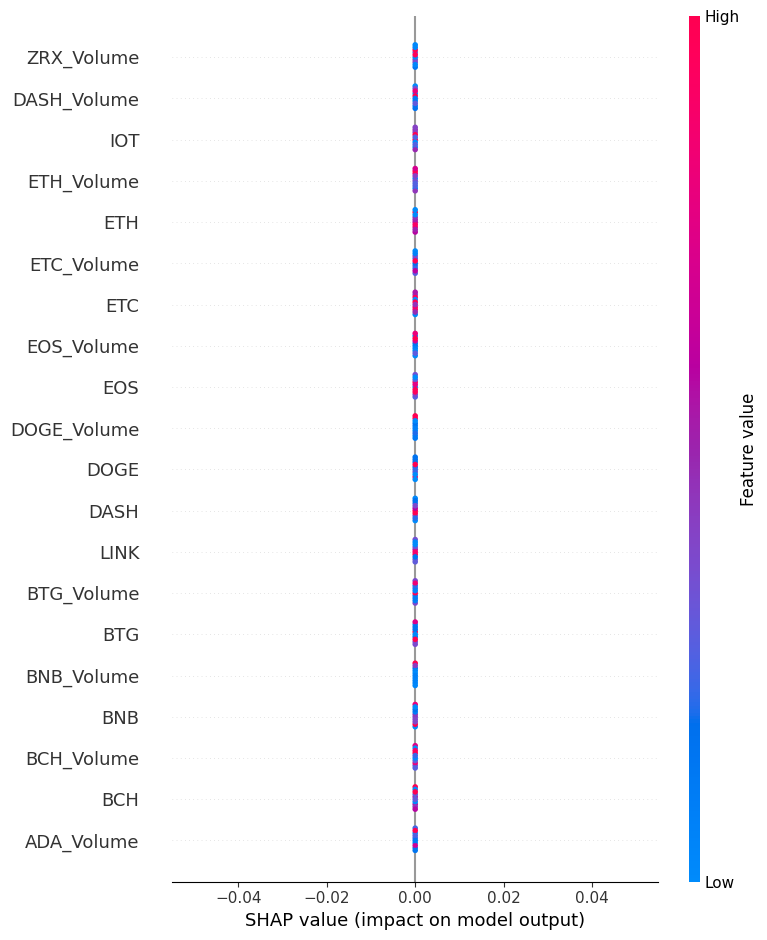

In [ ]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score

# Column selection for independent and dependent attributes
X = data.drop(columns=['Date', 'XRP'])
y = data['XRP']

# Splitting of dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking for NaN values
nan_rows_train = np.isnan(X_train).any(axis=1)
nan_rows_test = np.isnan(X_test).any(axis=1)

# Remove rows with NaN values
X_train = X_train[~nan_rows_train]
y_train = y_train[~nan_rows_train]

X_test = X_test[~nan_rows_test]
y_test = y_test[~nan_rows_test]

# Reshape the data for LSTM (samples, time steps, features)
n_steps = 1  # You can adjust this based on your sequence length
X_train = X_train.values.reshape(-1, n_steps, X_train.shape[1])
X_test = X_test.values.reshape(-1, n_steps, X_test.shape[1])

# Define and train your LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2)

# Function to calculate SHAP values using a custom approach
def custom_shap_values(model, X):
    num_samples = X.shape[0]
    shap_values = np.zeros((num_samples, X.shape[2]))  # Updated shape

    for i in range(num_samples):
        x = X[i:i+1]
        explainer = shap.GradientExplainer(model, x)
        shap_values[i] = explainer.shap_values(x)[0]  # Extract the SHAP values from the list

    return shap_values

# Calculate SHAP values
shap_values = custom_shap_values(model, X_test[:10])

# Create a summary plot for SHAP values
shap.summary_plot(shap_values, X_test[:10].reshape(-1, X_test.shape[2]), feature_names=X.columns, show=False)

# You can also compute feature importance scores and explanations
feature_importance = np.abs(shap_values).mean(axis=0)
feature_names = X.columns

for i, feature in enumerate(feature_names):
    print(f"Feature: {feature}")
    print(f"Importance Score: {feature_importance[i]}")
    print("\n")

# Prediction
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

If all the SHAP values are coming out as 0.0, it suggests that the model has not learned any meaningful feature importances during training. This can happen for various reasons:

1. **Model Complexity**: The model may be too simple to capture the relationships in your data. You can try increasing the complexity of the model, adding more layers or units.

2. **Training Data**: The model may not have enough informative data to learn from. Ensure that your training dataset contains enough samples and that the data is diverse and representative.

3. **Data Preprocessing**: Double-check your data preprocessing steps. Ensure that data normalization and scaling are performed correctly. Incorrect preprocessing can affect the model's ability to learn.

4. **Loss Function**: The choice of loss function can impact the model's learning. Depending on your problem, you might need to use a different loss function.

5. **Learning Rate**: The learning rate used during training may not be suitable. Adjusting the learning rate or using learning rate schedules can help.

6. **Overfitting**: Check if the model is overfitting the training data. Overfitting can lead to poor generalization. Consider adding regularization techniques such as dropout or L2 regularization.

7. **Feature Engineering**: Review your feature set. Ensure that the features are relevant and informative for the prediction task. Feature engineering can sometimes greatly improve model performance.

8. **Random Initialization**: The initial weights of the model can affect training. If you're using random weight initialization, consider trying different seeds or using pretrained embeddings.

9. **Debugging**: Use tools like TensorBoard to monitor training progress, loss curves, and gradients. This can help you identify issues during training.

10. **Evaluation Metric**: Ensure that you are using the correct evaluation metric to assess model performance. Sometimes, the model may be learning but not in a way that's evident with SHAP values.

## 7 LIME IMPLEMENTATION

```
`# This is formatted as code`
```



In [ ]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=efbebbe4ad014e55248900ddf0246873268efd55c7e6532ae7e660d83c8bf19f
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


##7.1 Lime Implementation Using Random Forest

Feature: 2 > 0.26
Importance Score: 0.250968116593085


Feature: 12 > 0.01
Importance Score: 0.22463656498535609


Feature: 38 > 0.38
Importance Score: 0.10510526341327288


Feature: 18 > 684.42
Importance Score: 0.04560550757392822


Feature: 40 > 238.30
Importance Score: 0.03681974116325477


Feature: 28 > 19.33
Importance Score: 0.025038451745090454


Feature: 8 > 91.73
Importance Score: 0.02110102076884184


Feature: 22 > 0.48
Importance Score: 0.019996651010953312


Feature: 10 > 502.11
Importance Score: 0.019866525465214203


Feature: 6 > 13.09
Importance Score: 0.013915957186030056




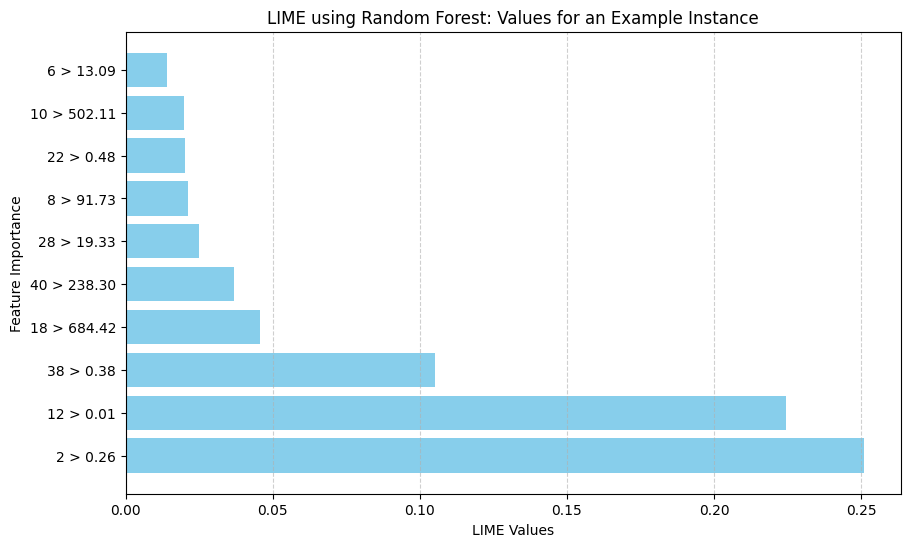

Mean Squared Error: 0.0077328136908313815
R-squared (R2) Score: 0.9681425811205728


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from lime.lime_tabular import LimeTabularExplainer

# Column selection for independent and dependent attributes
X = data.drop(columns=['Date', 'XRP'])
y = data['XRP']

# Splitting of dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the imputer with the strategy 'mean'
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Random Forest Regression Model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Model Fitting
model.fit(X_train_imputed, y_train)

# Initialize a LIME explainer for the Random Forest model
explainer = LimeTabularExplainer(X_train_imputed, mode="regression")

# Explanation for a single instance (you can loop through X_test_imputed if needed)
explanation = explainer.explain_instance(X_test_imputed[0], model.predict)

# Feature importance scores
feature_importance = explanation.as_list()

for feature, score in feature_importance:
    print(f"Feature: {feature}")
    print(f"Importance Score: {score}")
    print("\n")

# Create a bar plot for LIME values
features, values = zip(*explanation.as_list())
plt.figure(figsize=(10, 6))
plt.barh(features, values, color='skyblue')
plt.xlabel('LIME Values')
plt.ylabel('Feature Importance')
plt.title('LIME using Random Forest: Values for an Example Instance')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Save the plot to an image file (e.g., PNG)
plt.savefig('lime_plot_RF.png')

# Show the plot (optional)
plt.show()

# Prediction
y_pred = model.predict(X_test_imputed)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")


##7.2 Lime Using Linear Regression

X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names


Feature Values:
1 > 0.26: 0.7889169870488291
2 > 1274.84: 0.18299439973020953
4 > 91.73: -0.1583085949728438
6 > 0.01: 0.15385241381328119
8 > 21.33: -0.12840897597091894
9 > 684.42: 0.1208895021450929
7 > 9.32: -0.11560737398700872
0 > 8945.91: -0.08137691175345758
5 > 502.11: 0.043372127153398984
3 > 13.09: -0.01439759353002065
Predicted Value: 2.510217726596245


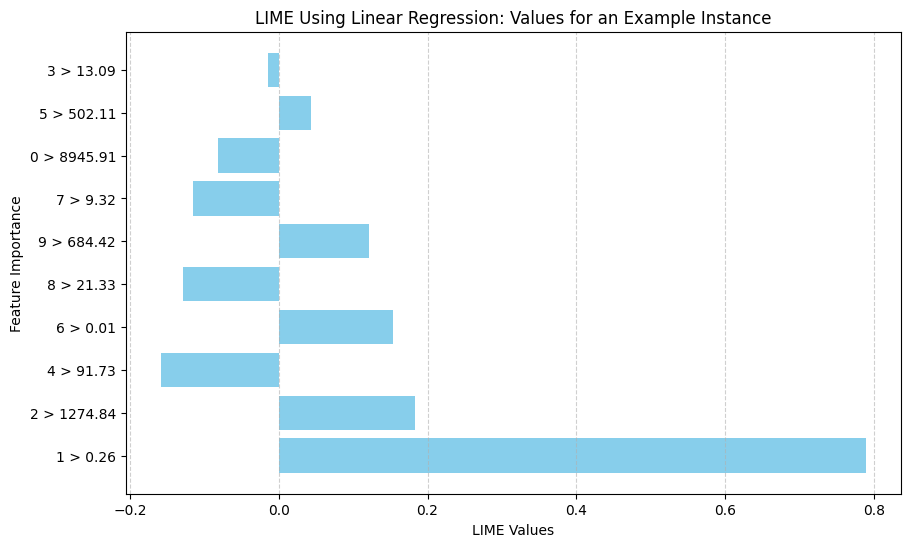

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from lime.lime_tabular import LimeTabularExplainer

# Load and prepare your data
data = pd.read_csv('/content/drive/MyDrive/DS_Specialization/2018_volume.csv')
X = data[['BTC', 'ADA', 'BCH', 'BNB', 'BTG', 'DASH', 'DOGE', 'EOS', 'ETC', 'ETH']]
y = data['XRP']

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

# Model Fitting
model.fit(X_train, y_train)

# Prediction- Test Data
y_pred = model.predict(X_test)

# Create a LIME explainer
explainer = LimeTabularExplainer(X_train.values, mode="regression")

# Explain an instance
explanation = explainer.explain_instance(X_test.iloc[0].values, model.predict)

# Get the LIME values
lime_values = explanation.as_list()

# Create a bar plot for LIME values
features, values = zip(*lime_values)
plt.figure(figsize=(10, 6))
plt.barh(features, values, color='skyblue')
plt.xlabel('LIME Values')
plt.ylabel('Feature Importance')
plt.title('LIME Using Linear Regression: Values for an Example Instance')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Print the feature values
print("Feature Values:")
for feature, value in lime_values:
    print(f"{feature}: {value}")

# Print the predicted value for the explained instance
print("Predicted Value:", model.predict([X_test.iloc[0].values])[0])


##7.3 Lime using gradient Boosting

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names


Feature Values:
2 <= 0.15: -0.18137047847970134
12 <= 0.00: -0.11985554087964799
18 <= 467.80: -0.06322804863591253
22 <= 0.25: -0.03675833202411277
150.72 < 40 <= 202.38: -0.03255815186064522
34 <= 2.42: -0.029822917325000645
38 <= 0.22: -0.029291970497629747
10 > 634.82: 0.024130943717482096
8 > 156.76: -0.02282772363693569
49036987.00 < 42 <= 134543704.00: -0.021738872461404896
Predicted Value: 0.23638898782336487


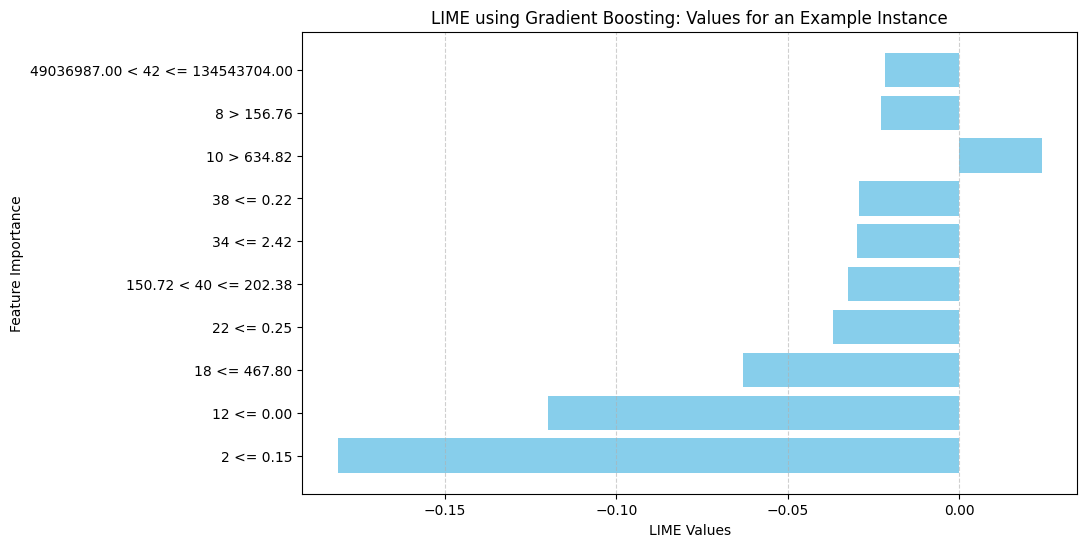

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from lime.lime_tabular import LimeTabularExplainer

# Load your data (you should load your data before the following code)
# data = pd.read_csv('/path/to/your/data.csv')

# Column selection for independent and dependent attributes
X = data.drop(columns=['Date', 'XRP'])
y = data['XRP']

# Splitting of dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking for NaN values
nan_rows_train = np.isnan(X_train).any(axis=1)
nan_rows_test = np.isnan(X_test).any(axis=1)

# Remove rows with NaN values
X_train = X_train[~nan_rows_train]
y_train = y_train[~nan_rows_train]

X_test = X_test[~nan_rows_test]
y_test = y_test[~nan_rows_test]

# Gradient Boosting Regression Model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Model Fitting
model.fit(X_train, y_train)

# Initialize LIME explainer
explainer = LimeTabularExplainer(X_train.values, mode="regression")

# Define the prediction function for the Gradient Boosting model
def predict_fn(X):
    return model.predict(X)

# Select a random sample for explanation
sample_idx = np.random.randint(0, len(X_test))
sample = X_test.iloc[sample_idx]

# Generate an explanation for the selected sample
explanation = explainer.explain_instance(sample, predict_fn)

# Print the feature values
print("Feature Values:")
for feature, value in explanation.as_list():
    print(f"{feature}: {value}")

# Print the predicted value for the explained instance
predicted_value = model.predict([sample])[0]
print("Predicted Value:", predicted_value)

# Create a bar plot for LIME values
features, values = zip(*explanation.as_list())
plt.figure(figsize=(10, 6))
plt.barh(features, values, color='skyblue')
plt.xlabel('LIME Values')
plt.ylabel('Feature Importance')
plt.title('LIME using Gradient Boosting: Values for an Example Instance')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot (optional)
plt.show()


##8.0 FROM HERE THE PREDICTION WORKS STARTS

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import shap



# Column selection for independent and dependent attributes
X = data[['BTC', 'ADA', 'BCH', 'BNB', 'BTG', 'DASH', 'DOGE', 'EOS', 'ETC', 'ETH']]
y = data['XRP']

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()

# Model Fitting
model.fit(X_train, y_train)

# Initialize an explainer for the Linear Regression model using SHAP
explainer = shap.Explainer(model, X_train)

# Function to predict XRP amount using Linear Regression and SHAP
def predict_xrp_amount(crypto_values):
    # Convert the input crypto values to a DataFrame
    input_data = pd.DataFrame([crypto_values], columns=X.columns)

    shap_values = explainer.shap_values(input_data)

    predicted_xrp_amount = model.predict(input_data) + shap_values

    return predicted_xrp_amount[0]

# Example usage:
input_crypto_values = [5878.129883, 0.02, 1374.39, 1.52, 260.179993, 487.140015, 0.00106, 1.09, 14.67, 306.019989]
predicted_xrp_amount = predict_xrp_amount(input_crypto_values)

print(f"Predicted XRP Amount: {predicted_xrp_amount}")


Predicted XRP Amount: [ 0.2409859  -0.15899493  0.26518291  0.239707    0.03755704  0.21746649
  0.08866937  0.32291038  0.22812383  0.17389195]
